<a href="https://colab.research.google.com/github/karloxkronfeld/Finanzas/blob/main/alpha_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install alpha_vantage

     |████████████████████████████████| 1.3MB 6.9MB/s 
     |████████████████████████████████| 296kB 23.7MB/s 
     |████████████████████████████████| 143kB 22.4MB/s 


In [ ]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.foreignexchange import ForeignExchange as fx
import sys
import random

In [ ]:
time=TimeSeries(key="000W9HI05KWAWA7B",output_format="pandas")
data=time.get_intraday("EURUSD",interval="1min",outputsize="full")
ejm=fx(key="000W9HI05KWAWA7B",output_format="pandas")

ValueError: ignored

In [ ]:

data_, meta_= ejm.get_currency_exchange_intraday(from_symbol="EUR", to_symbol="USD", interval='1min', outputsize='full')
data_

,1. open,2. high,3. low,4. close
date,,,,
2021-04-28 12:56:00,1.20688,1.20703,1.20670,1.20702
2021-04-28 12:55:00,1.20689,1.20713,1.20659,1.20670
2021-04-28 12:54:00,1.20699,1.20700,1.20670,1.20689
2021-04-28 12:53:00,1.20709,1.20715,1.20680,1.20690
2021-04-28 12:52:00,1.20690,1.20710,1.20670,1.20700
...,...,...,...,...
2021-04-27 13:01:00,1.20831,1.20832,1.20800,1.20818
2021-04-27 13:00:00,1.20817,1.20837,1.20790,1.20830
2021-04-27 12:59:00,1.20810,1.20817,1.20790,1.20800


In [ ]:
len(data_.index.day.unique())

2

In [ ]:
df = pd.read_csv('https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY_EXTENDED&symbol=AMZN&interval=15min&slice=year1month1&apikey=000W9HI05KWAWA7B')
print(df)

In [ ]:
import pandas as pd
import pandas_datareader as data

In [ ]:
datos_alpha=data.DataReader("EURUSD","av-intraday","2010-10-19","2020-10-21",api_key="000W9HI05KWAWA7B")

In [ ]:
datos_alpha

,open,high,low,close,volume
2020-10-19 09:55:00,1.1784,1.1785,1.1782,1.1784,0
2020-10-19 09:56:00,1.1784,1.1785,1.1782,1.1784,0
2020-10-19 09:57:00,1.1784,1.1784,1.1781,1.1784,0
2020-10-19 09:58:00,1.1784,1.1784,1.1779,1.1781,0
2020-10-19 09:59:00,1.1783,1.1784,1.1780,1.1783,0
...,...,...,...,...,...
2020-10-20 09:50:00,1.1816,1.1818,1.1814,1.1817,0
2020-10-20 09:51:00,1.1817,1.1818,1.1814,1.1816,0
2020-10-20 09:52:00,1.1817,1.1818,1.1813,1.1816,0
2020-10-20 09:53:00,1.1816,1.1816,1.1813,1.1815,0


In [ ]:
data.get

In [ ]:
data.get_data_alphavantage("EURUSD",api_key="000W9HI05KWAWA7B")

,open,high,low,close,volume
2001-08-21,0.9136,0.9148,0.9073,0.9130,0
2001-08-22,0.9130,0.9239,0.9127,0.9144,0
2001-08-23,0.9145,0.9167,0.9096,0.9152,0
2001-08-24,0.9152,0.9166,0.9073,0.9131,0
2001-08-27,0.9134,0.9144,0.9081,0.9115,0
...,...,...,...,...,...
2020-10-14,1.1743,1.1771,1.1718,1.1747,0
2020-10-15,1.1747,1.1758,1.1687,1.1709,0
2020-10-16,1.1708,1.1746,1.1692,1.1716,0
2020-10-19,1.1718,1.1794,1.1701,1.1767,0


In [ ]:
datos_alpha=datos_alpha.drop("volume",axis=1)

In [ ]:
datos_alpha.close.max()

1.1917

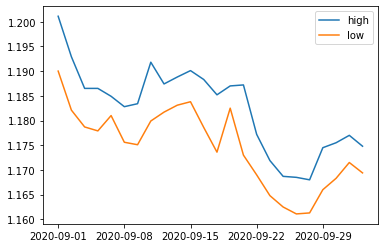

In [ ]:
datos_alpha[["high","low"]].plot()

In [ ]:
datos_meta=pd.read_csv("EURUSDseptiembre.xlsx").set_index("time")
datos_meta.index=pd.to_datetime(datos_meta.index).strftime("%Y-%m-%d")

In [ ]:
datos_meta=datos_meta[["bid","ask"]]

In [ ]:
datos_meta=datos_meta.groupby("time").mean()

In [ ]:
datos_meta["precio"]=(datos_meta["bid"]+datos_meta["ask"])/2

In [ ]:
datos=pd.concat((datos_meta,datos_alpha),axis=1)

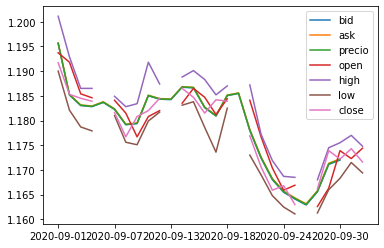

In [ ]:
datos.plot()

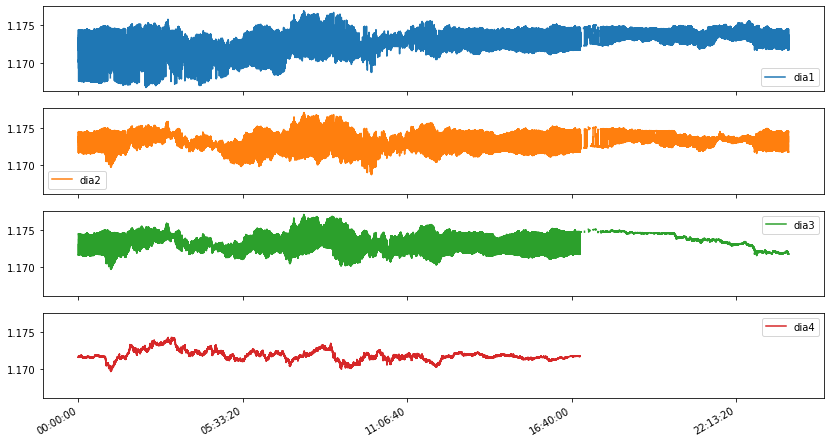

In [ ]:
df_dias.plot(figsize=(14,8),kind="line", subplots=True, layout=(4,1), sharey=True, sharex=True)
plt.show()

In [ ]:
# df = pd.read_csv('https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY_EXTENDED&symbol=MJ&interval=1min&slice=year1month1&apikey=000W9HI05KWAWA7B')
# print(df)

In [ ]:
# pd.read_csv("https://www.alphavantage.co/query?function=FX_INTRADAY&from_symbol=EUR&to_symbol=USD&interval=5min&apikey=demo&datatype=csv")

In [ ]:
key="000W9HI05KWAWA7B" #CLAVE GRATIS ALPHA VANTAGE
time= TimeSeries(key=key, output_format="csv") #el modulo para hacer esto, output=csv o ´pandas"
data,meta_data=time.get_intraday_extended(symbol="MJ", interval="5min", slice="year1month1") #EXTENDED FUNCIONA PARA ACCIONES
data=list(data)

NameError: ignored

In [ ]:
key="000W9HI05KWAWA7B"
time= TimeSeries(key=key, output_format="pandas")
data, metadata= time.get_intraday(symbol="EURUSD",interval="15min")
# data, metadata= time.get_daily_adjusted(symbol="BABA",outputsize="full")
data["4. close"].plot()